In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import datetime as dt

In [2]:
!pip install gdown

In [3]:
#msft
!gdown 'https://drive.google.com/uc?export=download&id=1HV5A7Wbqrfu9fxx4KlAZRrwe7iu51l0K'
#tatmotors
!gdown 'https://drive.google.com/uc?export=download&id=14Kdf2CZwt-TmS9FD35ChiwqiFm9QUowu'
#tcs
!gdown 'https://drive.google.com/uc?export=download&id=1bh7mHFAUwoW_CIl6RkNdTa74M_ONXXLd'
#reliance
!gdown 'https://drive.google.com/uc?export=download&id=1xV-6oHcueuYpp8s6h3iX37KyJ9TDCQMj'
#nifty bank
!gdown 'https://drive.google.com/uc?export=download&id=11MJOzb4QLGhstJb2CDsmw6C8ECBsi8Zd'
#nifty50
!gdown 'https://drive.google.com/uc?export=download&id=11f8_KeYOksOF1DGIHjEBlrBWmU3GdJkk'
#godrejindia
!gdown 'https://drive.google.com/uc?export=download&id=1c7dk0PI90KPsXLhMYSUTAeyKFVq8sbe-'
#bnbusdt
!gdown 'https://drive.google.com/uc?export=download&id=1gldfddA6O99ReLtfF8bZ0grHY9wQ1t79'
#btcusdt
!gdown 'https://drive.google.com/uc?export=download&id=1Xb4CpsjSrpA5KXYpQi4Jppn15N5JgbcL'
#dogeusdt
!gdown 'https://drive.google.com/uc?export=download&id=1pN1p3JXCeBeRF4Cdfl4TbIOt86MKJInS'
#ehusdt
!gdown 'https://drive.google.com/uc?export=download&id=1wRiIhbu5UPA9tyI9Bie_d3s_7hLJO5th'
#solusdt
!gdown 'https://drive.google.com/uc?export=download&id=1sTK5z_uiB8FYbdpVQjI0nmCn69xATOrm'
#audusd
!gdown 'https://drive.google.com/uc?export=download&id=1Zn_-DYiXB8oN1Hzilo7NrWUzhhV1F4vu'
#eurusd
!gdown 'https://drive.google.com/uc?export=download&id=1cfUt_l4dSzm9T-U1uupVtRSyrncpdqlY'
#gbpusd
!gdown 'https://drive.google.com/uc?export=download&id=1qreCd-9VpVPmHymw3YiCxxQnPS6zP0w2'
#usdcad
!gdown 'https://drive.google.com/uc?export=download&id=1J1WvB8Y8kJesPE__6LlJuZUF1rFBReEJ'
#usdjpy
!gdown 'https://drive.google.com/uc?export=download&id=1jpfIHtC0Kuv00kU8DLmLPxf5YYzNQnla'
#aapl
!gdown 'https://drive.google.com/uc?export=download&id=17Rv4g5pUbdlfU-Zsu7PGtGAxfTLjRYm9'
#amzn
!gdown 'https://drive.google.com/uc?export=download&id=1WmZPKRIu5IPwyov6DSh11WD2yLR1TbQ3'
#dow
!gdown 'https://drive.google.com/uc?export=download&id=1L_sKTIxpVk89PAqFU0RF0d2roTjZhtxz'
#gs
!gdown 'https://drive.google.com/uc?export=download&id=1Ig_TkrXuEFu_az78h-QIgjjjF9PYejZv'
#meta
!gdown 'https://drive.google.com/uc?export=download&id=1K7T7D4pnz9189rRJhRj_OTvGaUS9kmfx'

Downloading...
From: https://drive.google.com/uc?export=download&id=1HV5A7Wbqrfu9fxx4KlAZRrwe7iu51l0K
To: /content/MSFT_1d.csv
100% 214k/214k [00:00<00:00, 13.4MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=14Kdf2CZwt-TmS9FD35ChiwqiFm9QUowu
To: /content/TATAMOTORS_1d.csv
100% 222k/222k [00:00<00:00, 62.2MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1bh7mHFAUwoW_CIl6RkNdTa74M_ONXXLd
To: /content/TCS_1d.csv
100% 232k/232k [00:00<00:00, 59.3MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1xV-6oHcueuYpp8s6h3iX37KyJ9TDCQMj
To: /content/RELIANCE_1d.csv
100% 227k/227k [00:00<00:00, 67.0MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=11MJOzb4QLGhstJb2CDsmw6C8ECBsi8Zd
To: /content/NIFTY BANK_1d.csv
100% 226k/226k [00:00<00:00, 29.2MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=11f8_KeYOksOF1DGIHjEBlrBWmU3GdJkk
To: /content/NIFTY 50_1d.csv
100% 220k/220k [00:00<00

In [4]:
ETHUSDT = pd.read_csv('ETHUSDT_1d.csv', parse_dates=True, index_col='timestamp')
EURUSD = pd.read_csv('EURUSD_1d.csv', parse_dates=True, index_col='DateTime')
TCS = pd.read_csv('TCS_1d.csv', parse_dates=True, index_col='date')
NIFTY50 = pd.read_csv('NIFTY 50_1d.csv', parse_dates=True, index_col='date')
AMZN = pd.read_csv('AMZN_1d.csv', parse_dates=True, index_col='timestamp')
AAPL= pd.read_csv('AAPL_1d.csv', parse_dates=True, index_col='timestamp')
AUDUSD=pd.read_csv('AUDUSD_1d.csv', parse_dates=True, index_col='DateTime')
BNBUSDT=pd.read_csv('BNBUSDT_1d.csv', parse_dates=True, index_col='timestamp')
DOGEUSDT=pd.read_csv('DOGEUSDT_1d.csv', parse_dates=True, index_col='timestamp')
BTCUSDT=pd.read_csv('BTCUSDT_1d.csv', parse_dates=True, index_col='timestamp')
SOLUSDT=pd.read_csv('SOLUSDT_1d.csv', parse_dates=True, index_col='timestamp')
DOW=pd.read_csv('DOW_1d.csv', parse_dates=True, index_col='timestamp')
GBPUSD=pd.read_csv('GBPUSD_1d.csv', parse_dates=True, index_col='DateTime')
GS=pd.read_csv('GS_1d.csv', parse_dates=True, index_col='timestamp')
META=pd.read_csv('META_1d.csv', parse_dates=True, index_col='timestamp')
GODREJIND=pd.read_csv('GODREJIND_1d.csv', parse_dates=True, index_col='date')
MSFT=pd.read_csv('MSFT_1d.csv', parse_dates=True, index_col='timestamp')
RELIANCE=pd.read_csv('RELIANCE_1d.csv', parse_dates=True, index_col='date')
NIFTYBANK=pd.read_csv('NIFTY BANK_1d.csv', parse_dates=True, index_col='date')
TATAMOTORS=pd.read_csv('TATAMOTORS_1d.csv', parse_dates=True, index_col='date')
USDCAD=pd.read_csv('USDCAD_1d.csv', parse_dates=True, index_col='DateTime')
USDJPY=pd.read_csv('USDJPY_1d.csv', parse_dates=True, index_col='DateTime')

<ipython-input-4-eefb1c329231>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  GS=pd.read_csv('GS_1d.csv', parse_dates=True, index_col='timestamp')
<ipython-input-4-eefb1c329231>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  META=pd.read_csv('META_1d.csv', parse_dates=True, index_col='timestamp')


In [5]:
datasets = {'ETHUSDT': ETHUSDT, 'EURUSD': EURUSD, 'TCS': TCS, 'NIFTY50': NIFTY50, 'AMZN': AMZN, 'AAPL': AAPL,
            'AUDUSD': AUDUSD, 'BNBUSDT': BNBUSDT, 'DOGEUSDT': DOGEUSDT, 'BTCUSDT': BTCUSDT, 'SOLUSDT': SOLUSDT,
            'DOW': DOW, 'GBPUSD': GBPUSD, 'GS': GS, 'META': META, 'GODREJIND': GODREJIND, 'MSFT': MSFT,
            'RELIANCE': RELIANCE, 'NIFTYBANK': NIFTYBANK, 'TATAMOTORS': TATAMOTORS, 'USDCAD': USDCAD, 'USDJPY': USDJPY}

for name, df in datasets.items():
    df.index.name = 'DateTime'

In [6]:
TCS['DateTime'] = TCS.index.date
GODREJIND['DateTime'] = GODREJIND.index.date
NIFTY50['DateTime'] = NIFTY50.index.date
NIFTYBANK['DateTime'] = NIFTYBANK.index.date
RELIANCE['DateTime'] = RELIANCE.index.date
TATAMOTORS['DateTime'] = TATAMOTORS.index.date

AAPL['DateTime'] = AAPL.index.date
AMZN['DateTime'] = AMZN.index.date
DOW['DateTime'] = DOW.index.date
MSFT['DateTime'] = MSFT.index.date

AUDUSD['DateTime'] = AUDUSD.index.date
EURUSD['DateTime'] = EURUSD.index.date
GBPUSD['DateTime'] = GBPUSD.index.date
USDCAD['DateTime'] = USDCAD.index.date
USDJPY['DateTime'] = USDJPY.index.date


GS['DateTime'] = pd.to_datetime(GS.index, unit='ms')
META['DateTime'] = pd.to_datetime(META.index, unit='ms')
GS['DateTime'] = GS['DateTime'].dt.date
META['DateTime'] = META['DateTime'].dt.date

In [7]:
def clean_data(df):
    df.index = pd.to_datetime(df.index)
    df.index = df.index.tz_localize(None)
    df = df[~df.index.duplicated(keep='first')]
    return df

GS = clean_data(GS)
META = clean_data(META)
ETHUSDT = clean_data(ETHUSDT)
EURUSD = clean_data(EURUSD)
TCS = clean_data(TCS)
NIFTY50 = clean_data(NIFTY50)
NIFTYBANK = clean_data(NIFTYBANK)
RELIANCE = clean_data(RELIANCE)
TATAMOTORS = clean_data(TATAMOTORS)
AAPL = clean_data(AAPL)
AMZN = clean_data(AMZN)
AUDUSD = clean_data(AUDUSD)
BNBUSDT = clean_data(BNBUSDT)
DOGEUSDT = clean_data(DOGEUSDT)
BTCUSDT = clean_data(BTCUSDT)
SOLUSDT = clean_data(SOLUSDT)
DOW = clean_data(DOW)
GBPUSD = clean_data(GBPUSD)
USDCAD = clean_data(USDCAD)
USDJPY = clean_data(USDJPY)
MSFT=clean_data(MSFT)
GODREJIND=clean_data(GODREJIND)

In [8]:
total=[]

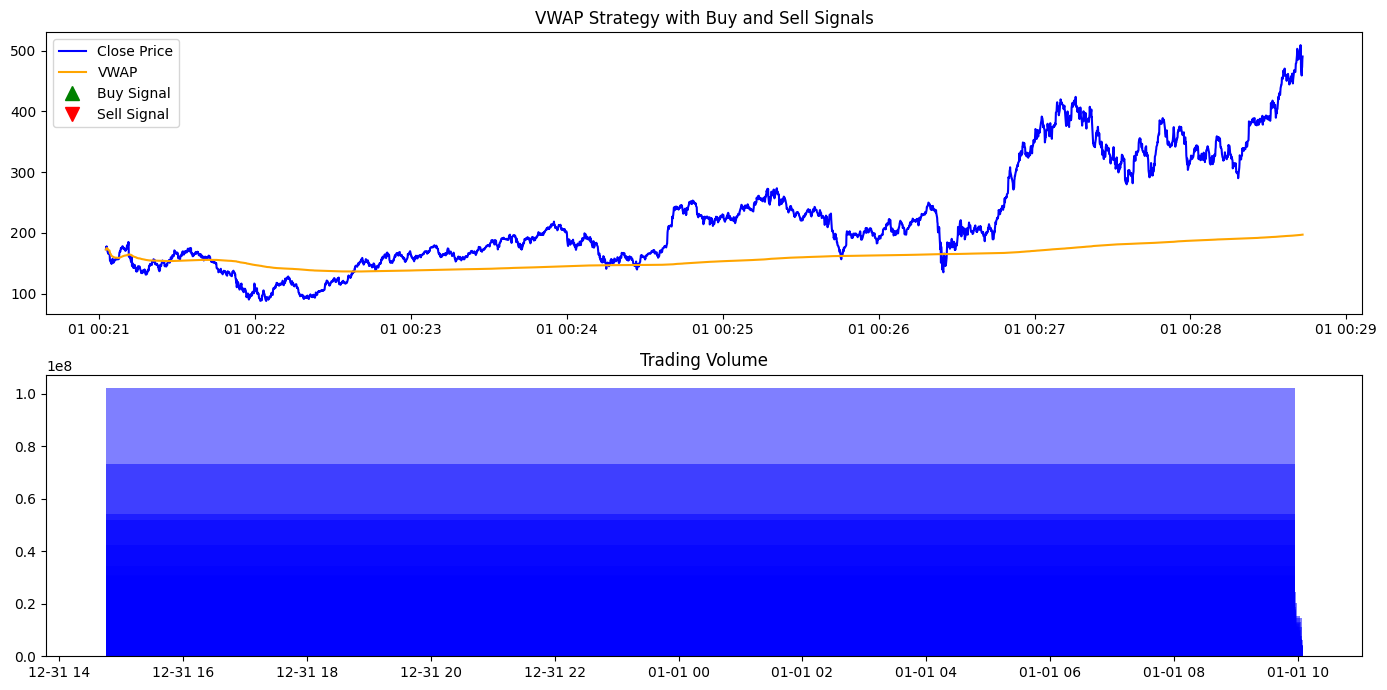

Total return: 0.00%


In [9]:
df=GS.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=5).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=5).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")


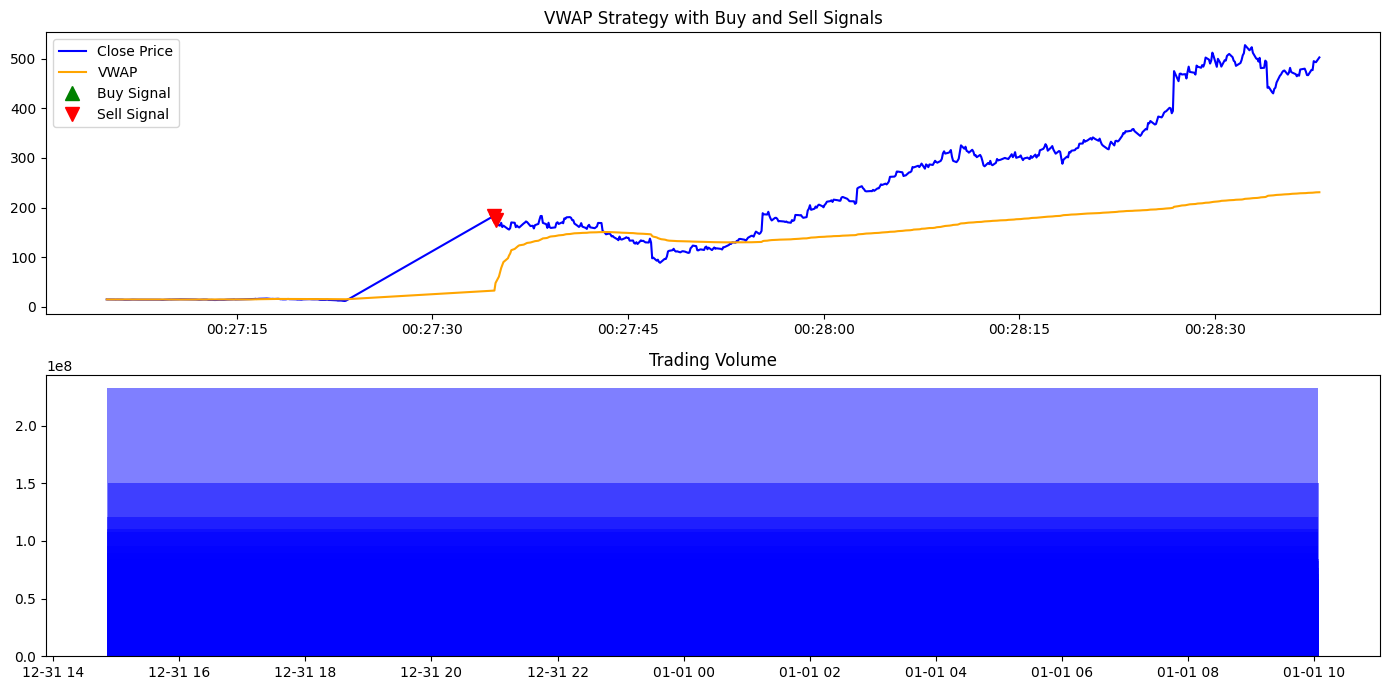

Total return: 6.79%


In [10]:
df=META.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=5).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=5).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

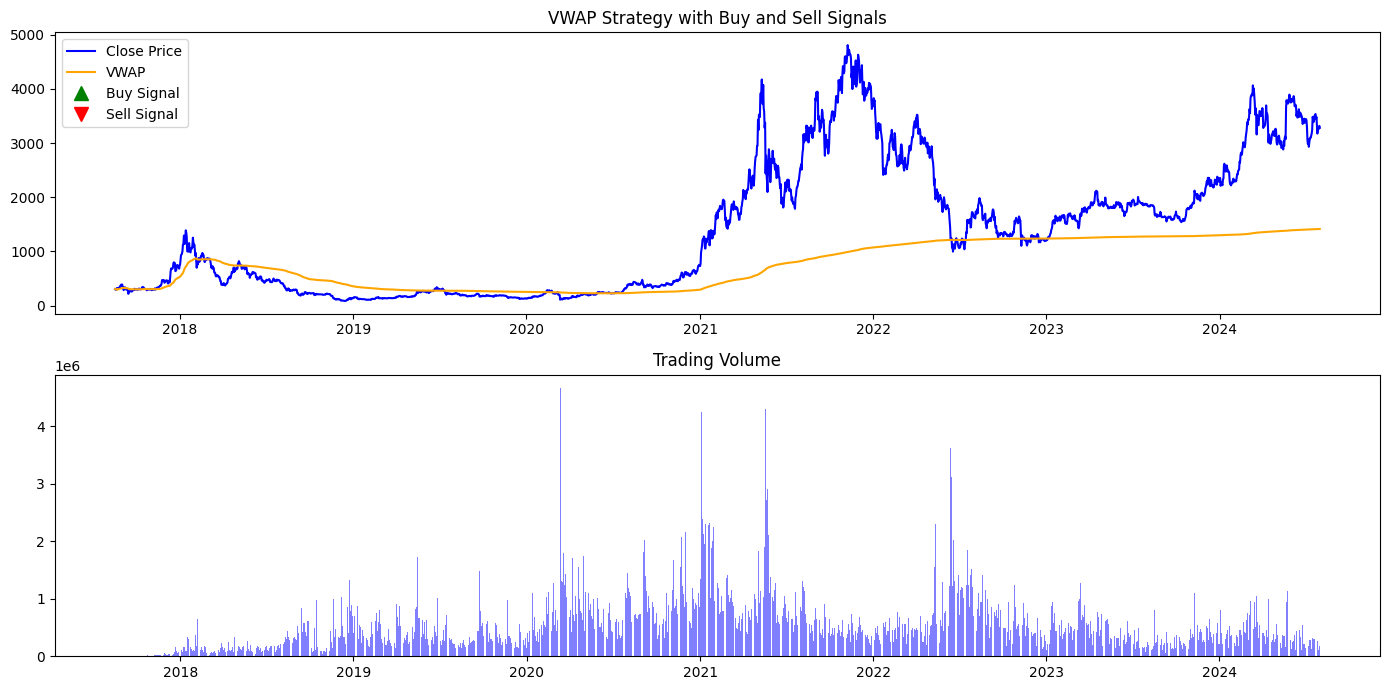

Total return: 0.00%


In [11]:
df=ETHUSDT.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=5).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=5).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

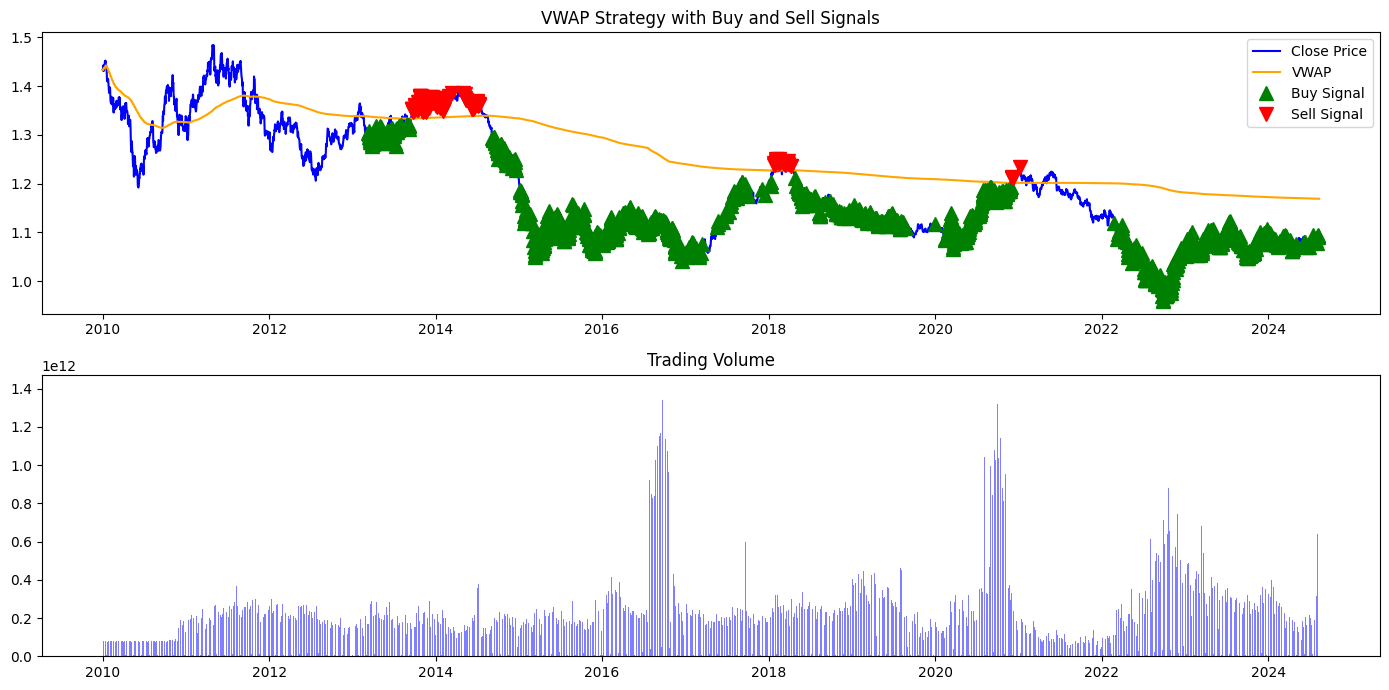

Total return: 11.44%


In [12]:
df=EURUSD.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=1000).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=1000).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

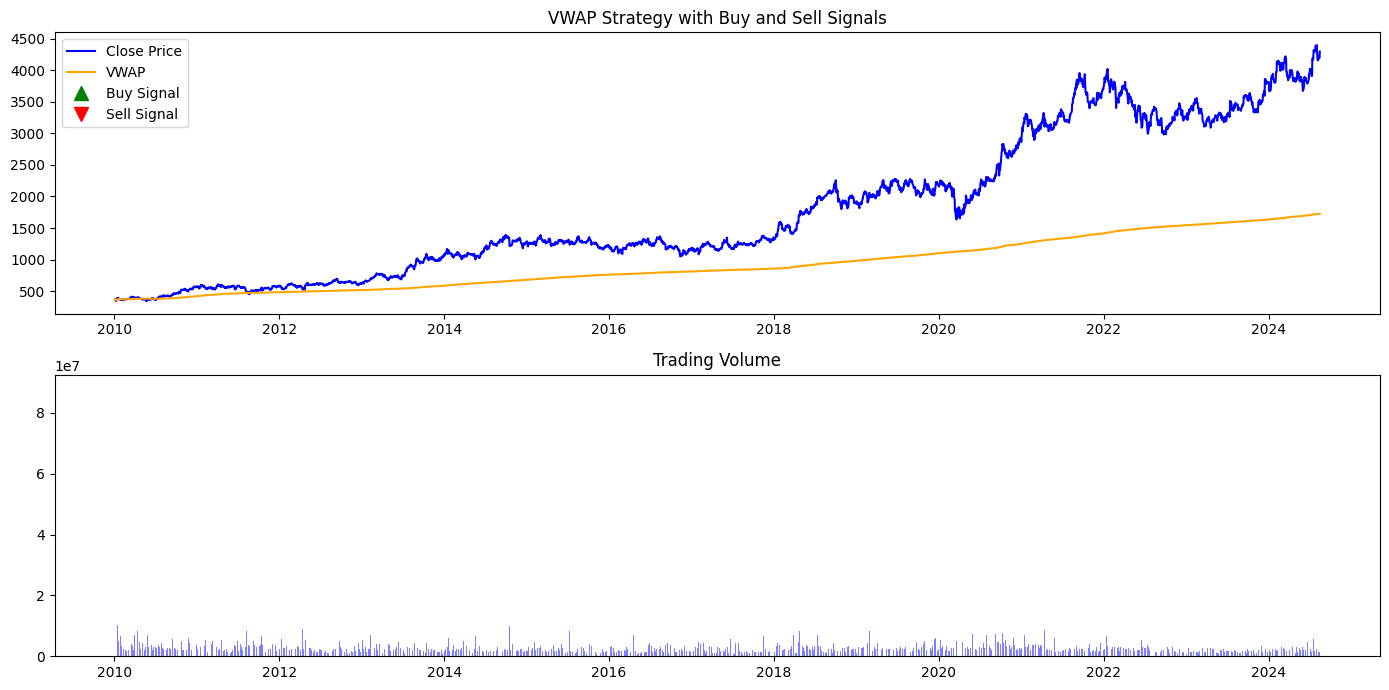

Total return: 0.00%


In [13]:
df=TCS.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=5).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=5).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

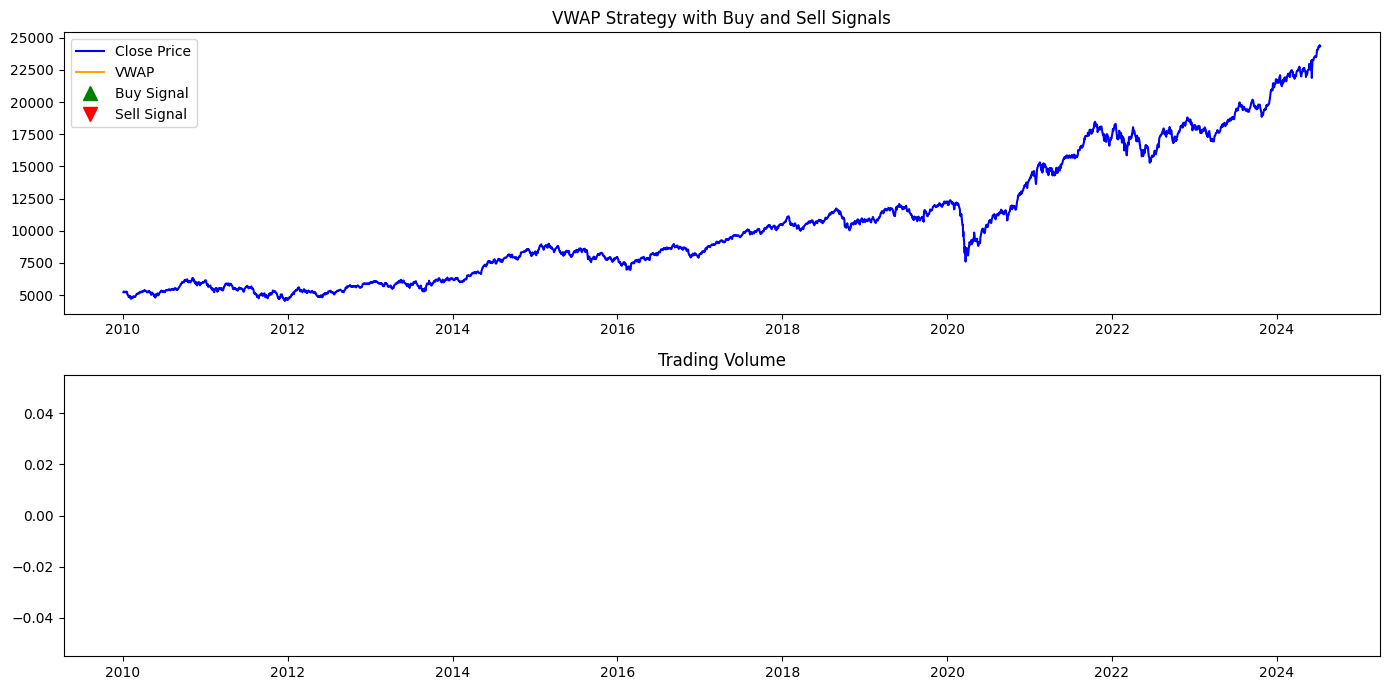

Total return: 0.00%


In [14]:
df=NIFTY50.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=5).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=5).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

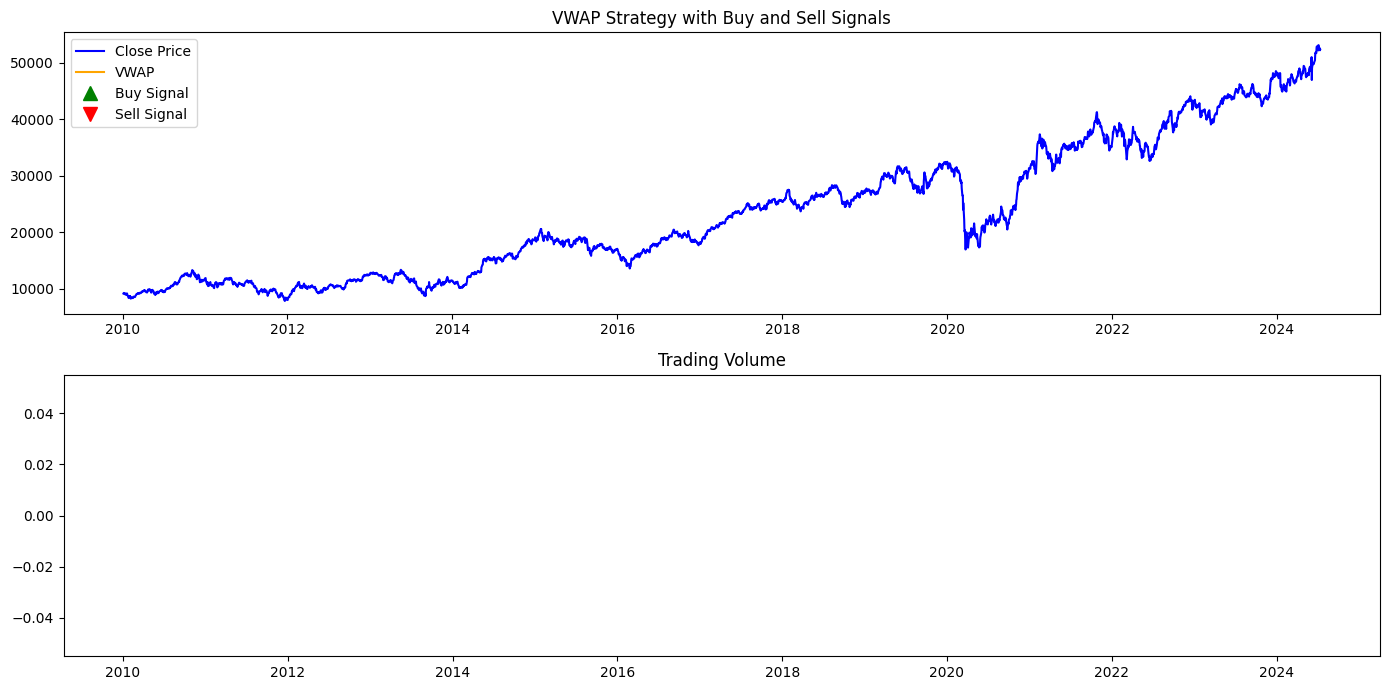

Total return: 0.00%


In [15]:
df=NIFTYBANK.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=5).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=5).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

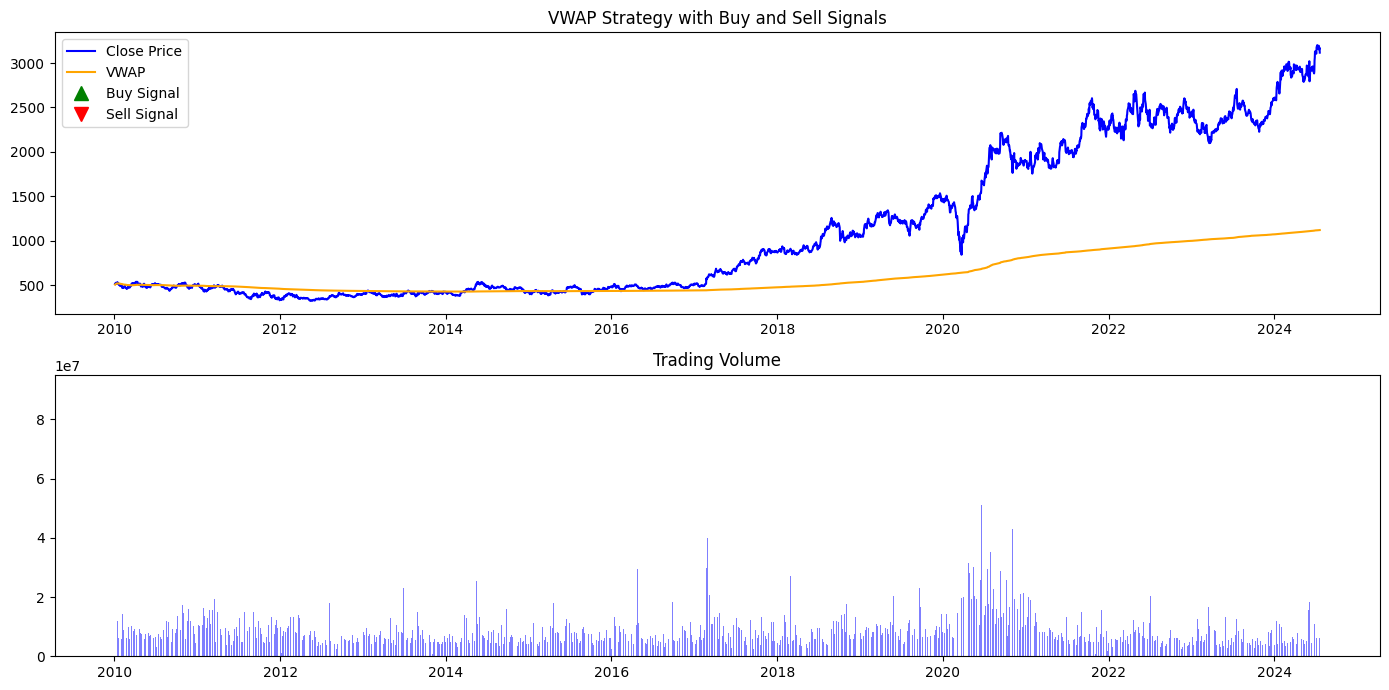

Total return: 0.00%


In [16]:
df=RELIANCE.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=5).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=5).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

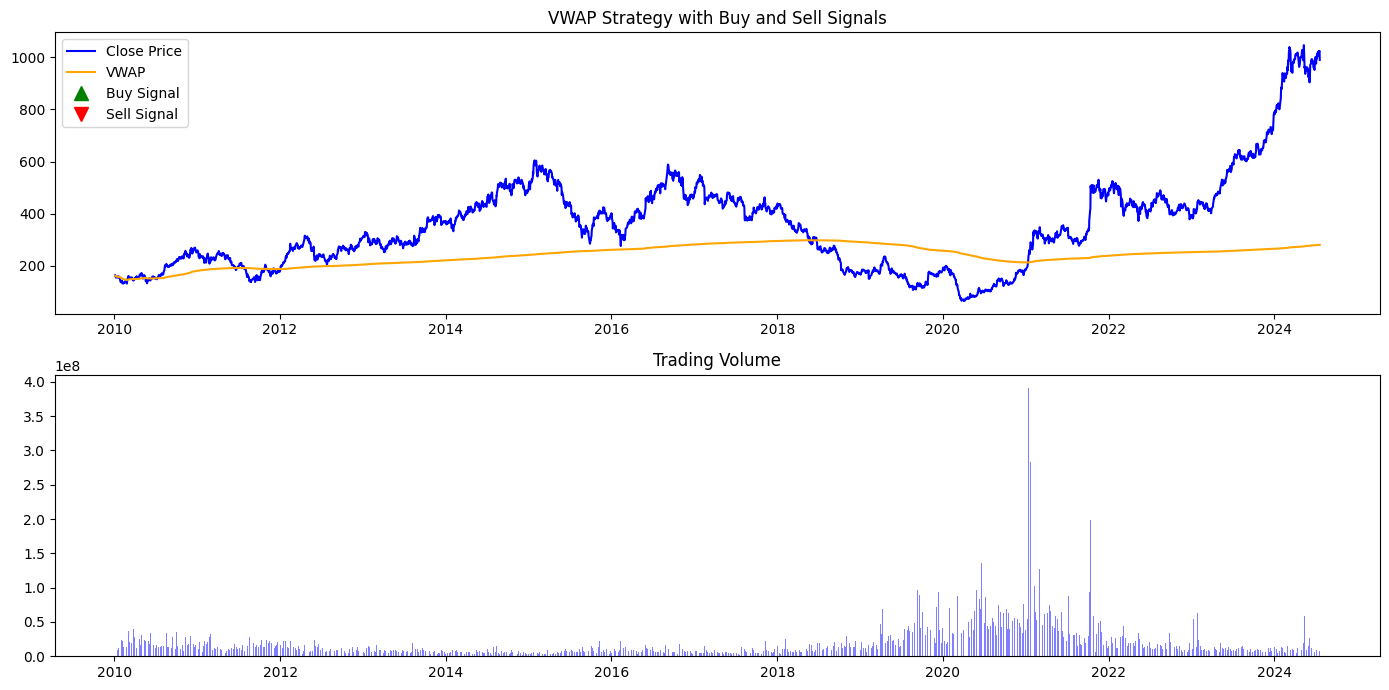

Total return: 0.00%


In [17]:
df=TATAMOTORS.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=5).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=5).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

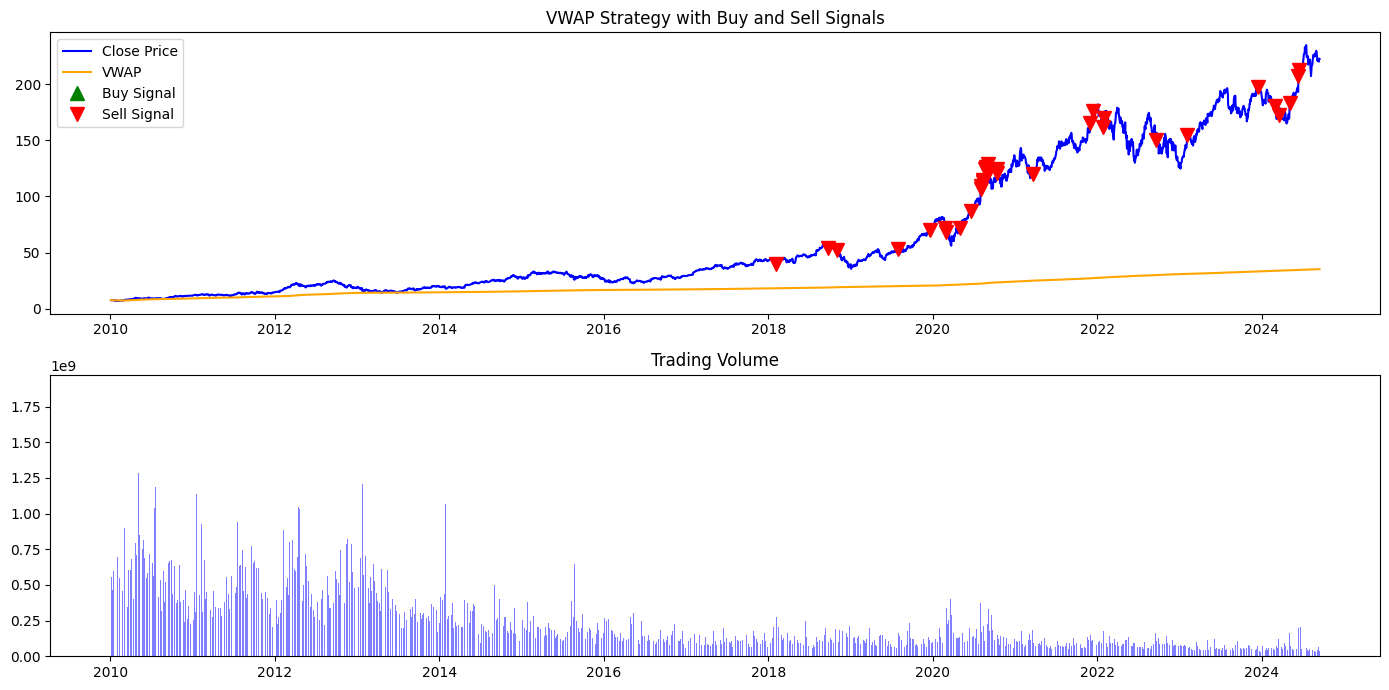

Total return: -9.71%


In [18]:
df=AAPL.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=2000).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=2000).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

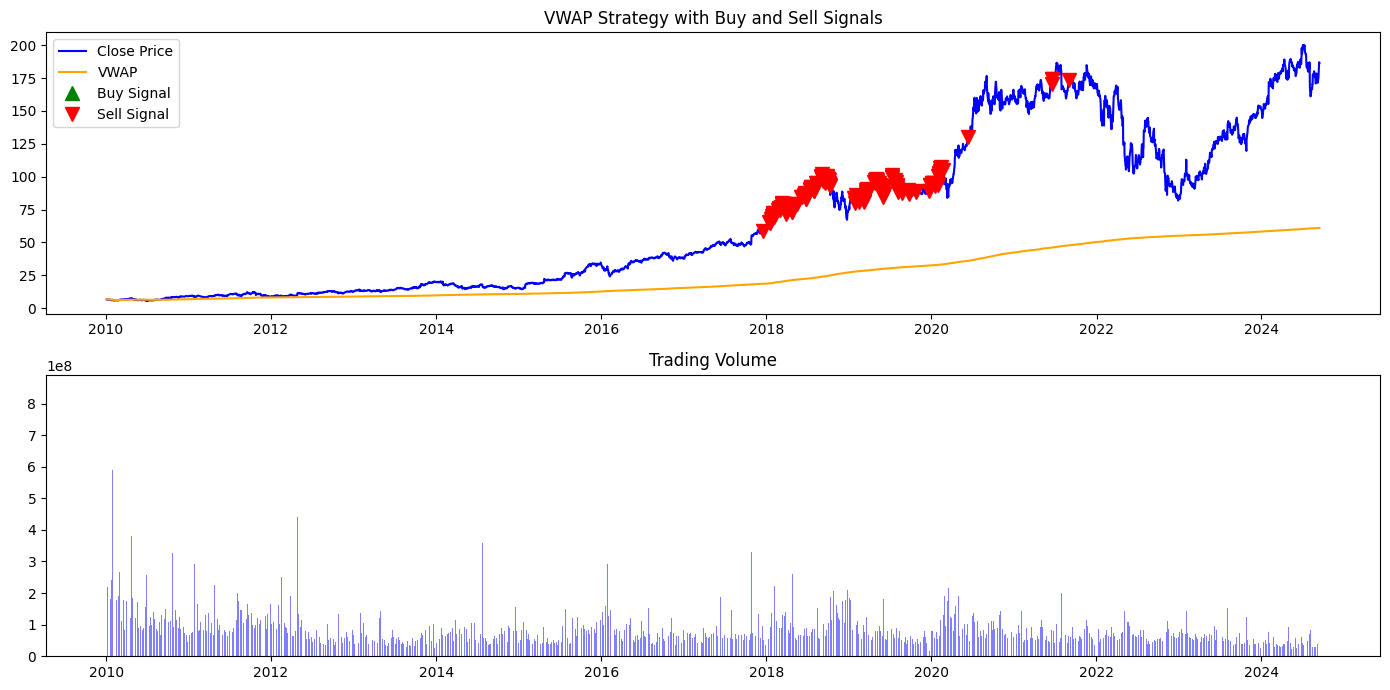

Total return: 32.37%


In [19]:
df=AMZN.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=2000).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=2000).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

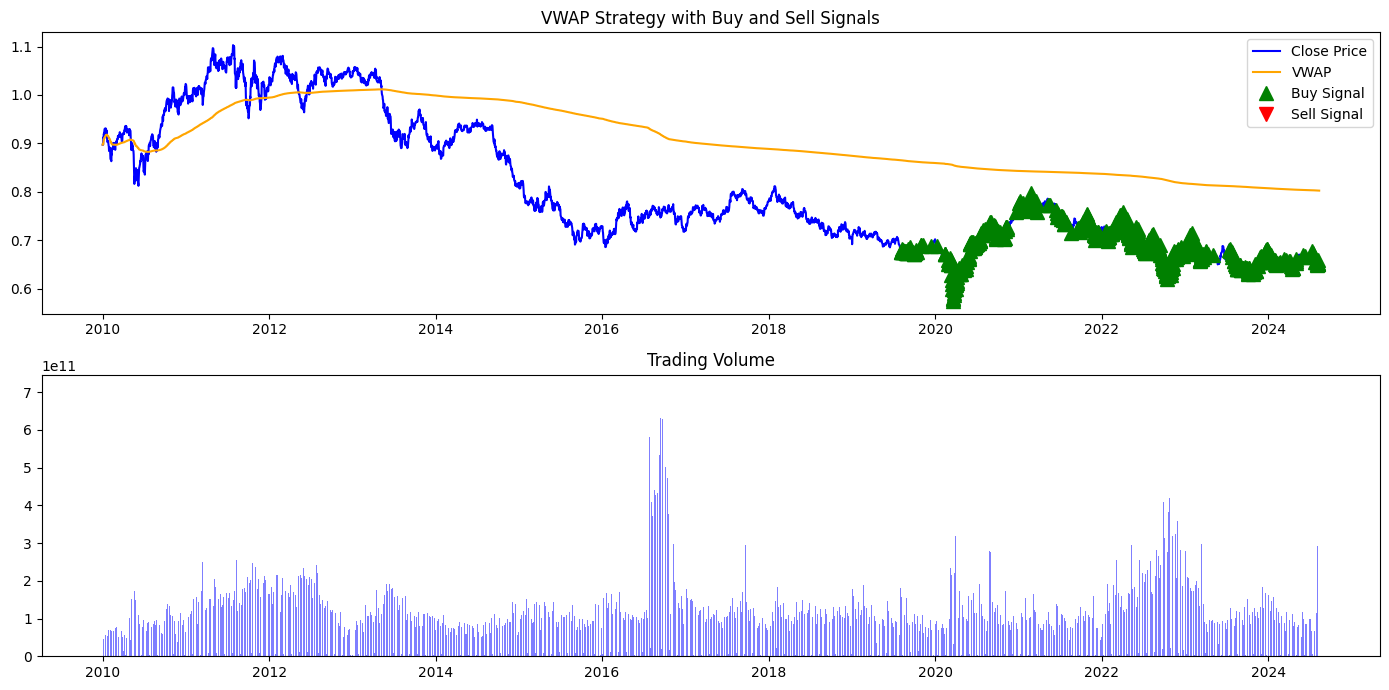

Total return: -9.81%


In [20]:
df=AUDUSD.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=3000).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=3000).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

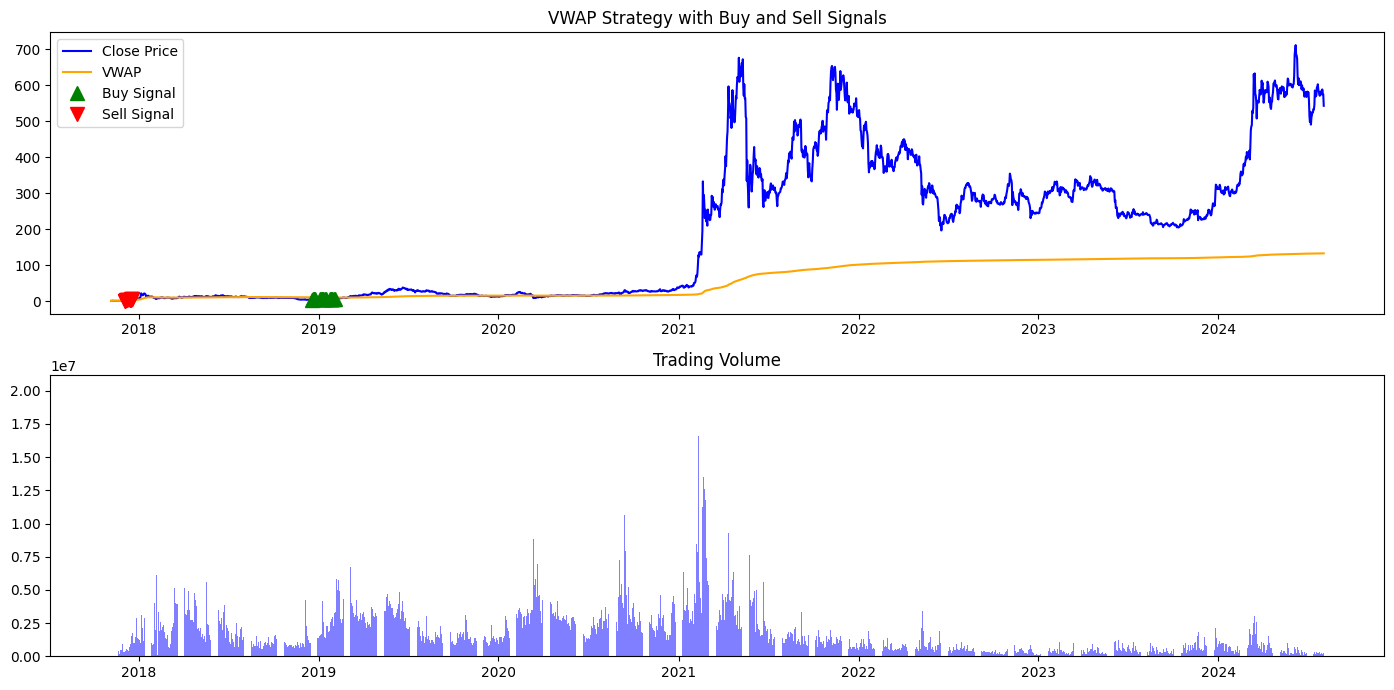

Total return: -33.51%


In [21]:
df=BNBUSDT.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=20).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=20).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

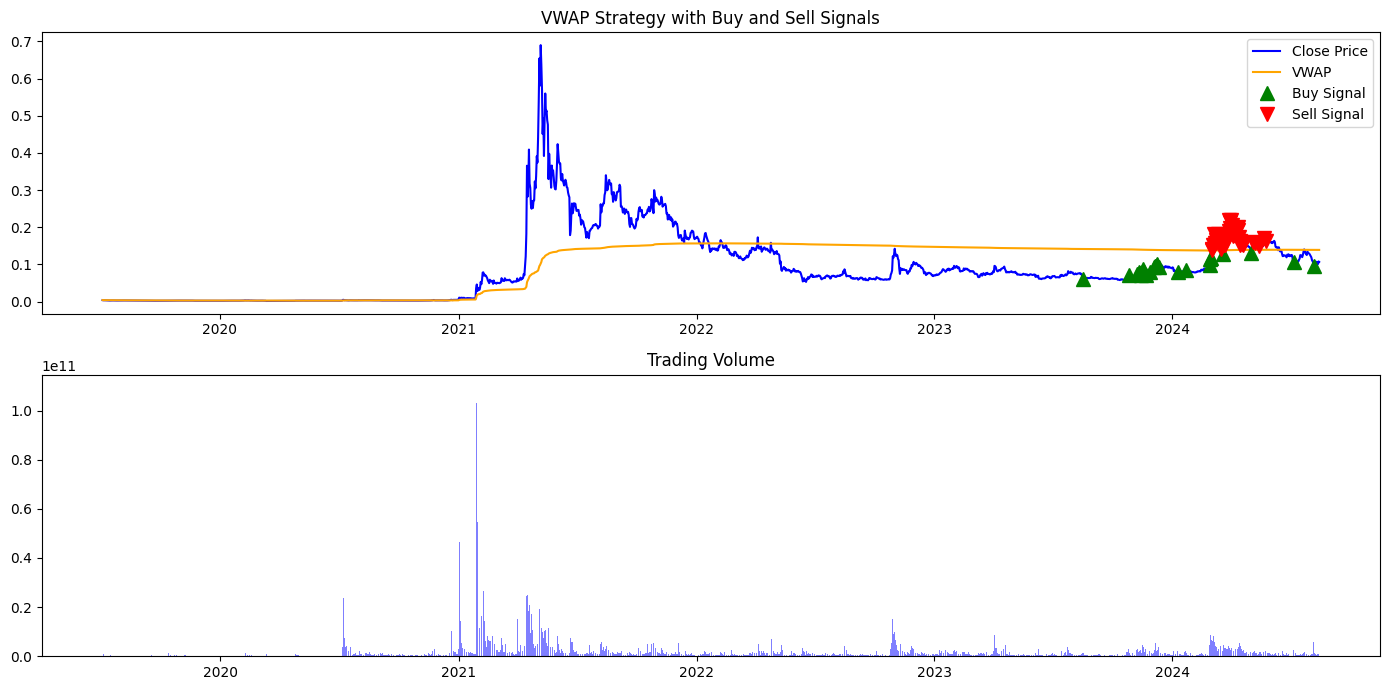

Total return: 22.26%


In [22]:
df=DOGEUSDT.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=1500).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=1500).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

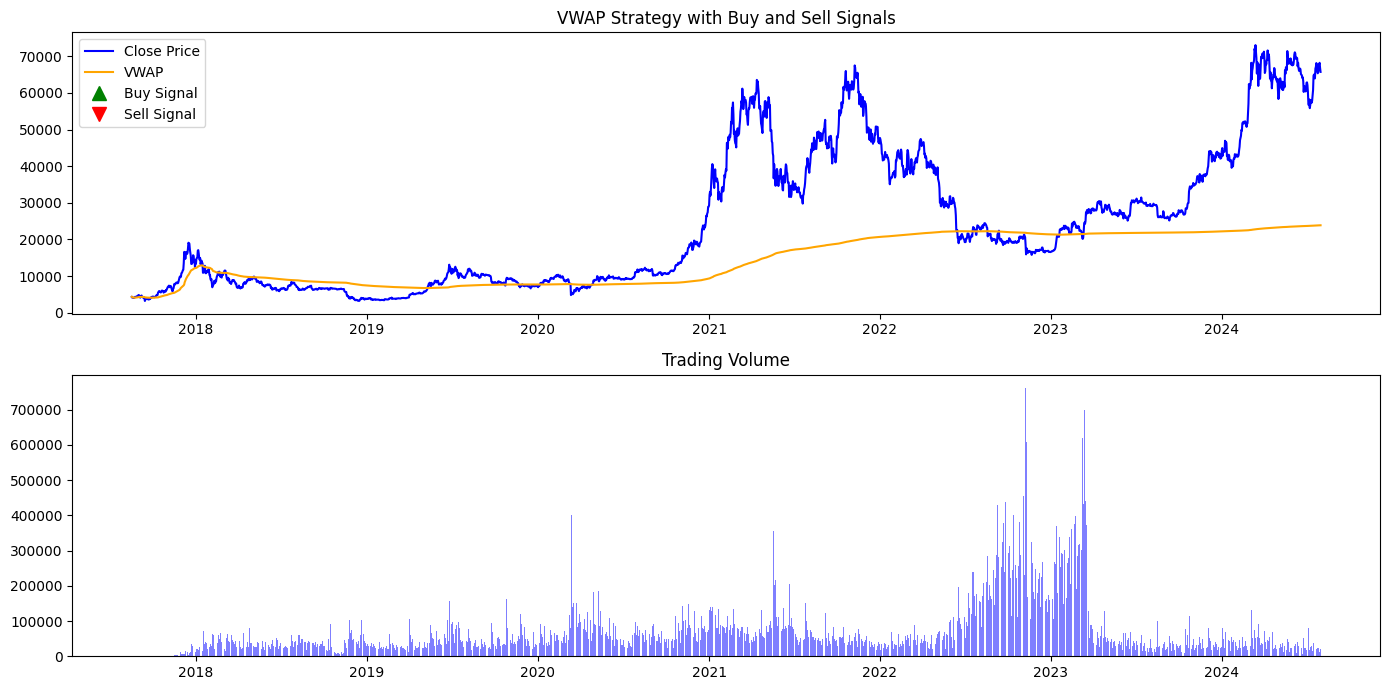

Total return: 0.00%


In [23]:
df=BTCUSDT.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=4).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=4).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

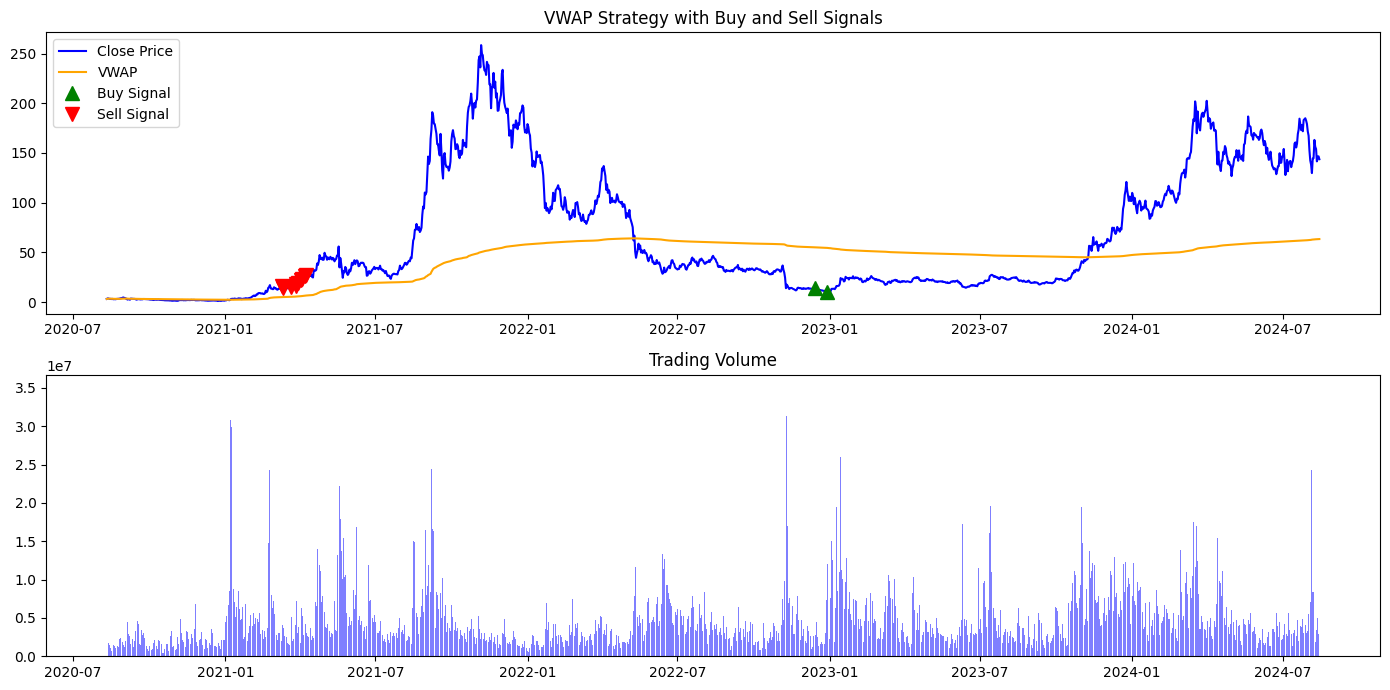

Total return: -15.40%


In [24]:
df=SOLUSDT.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=200).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=200).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

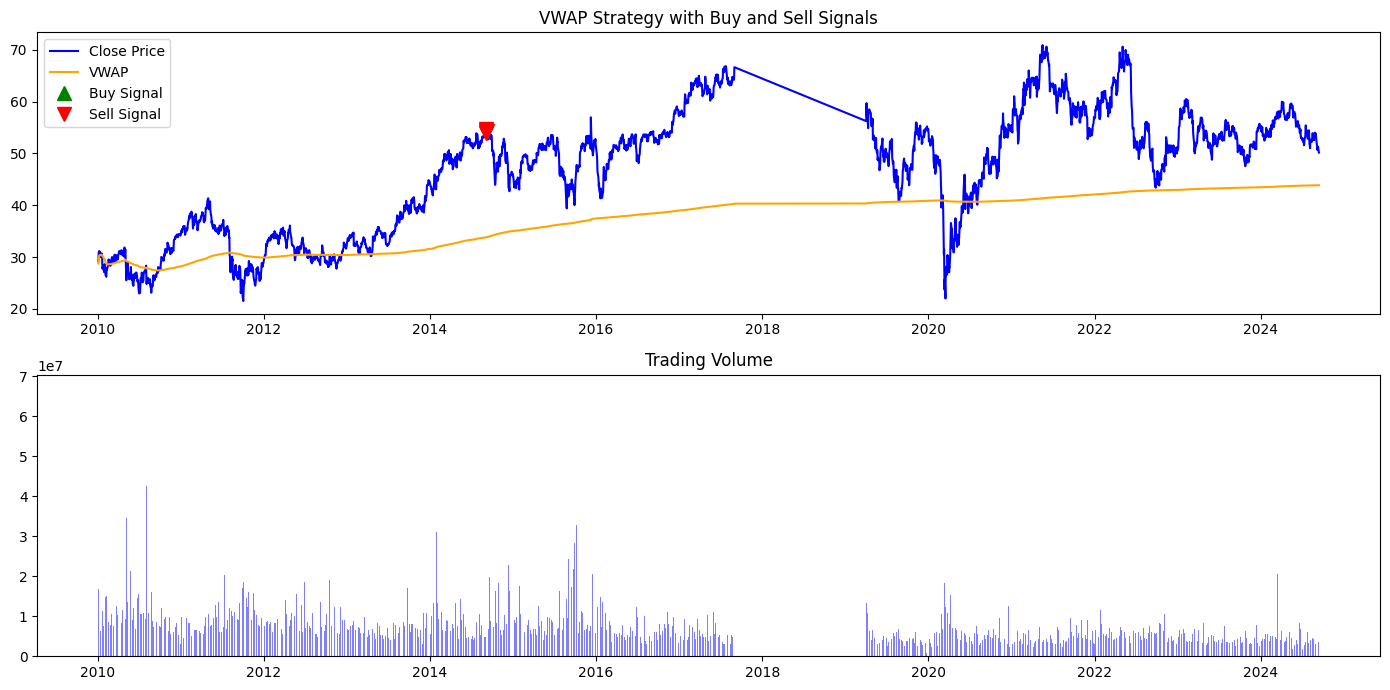

Total return: 1.70%


In [25]:
df=DOW.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=20).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=20).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

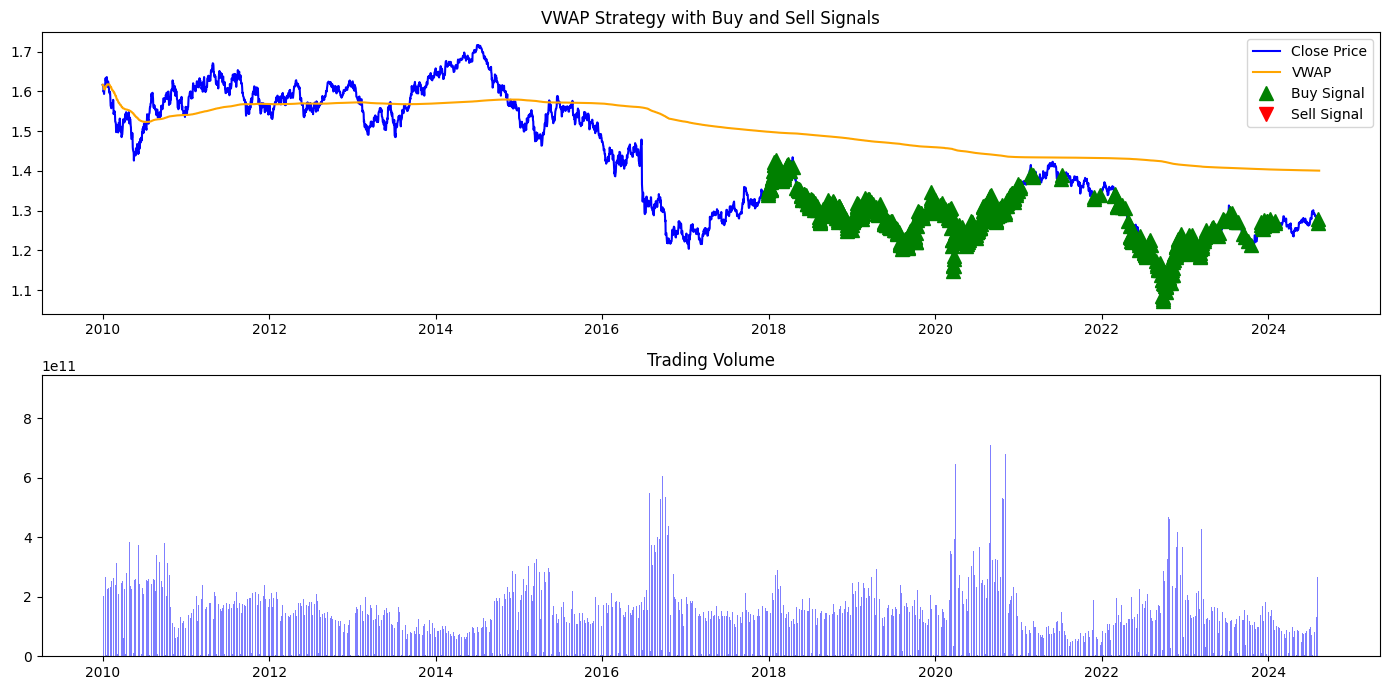

Total return: 5.36%


In [26]:
df=GBPUSD.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=2500).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=2500).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

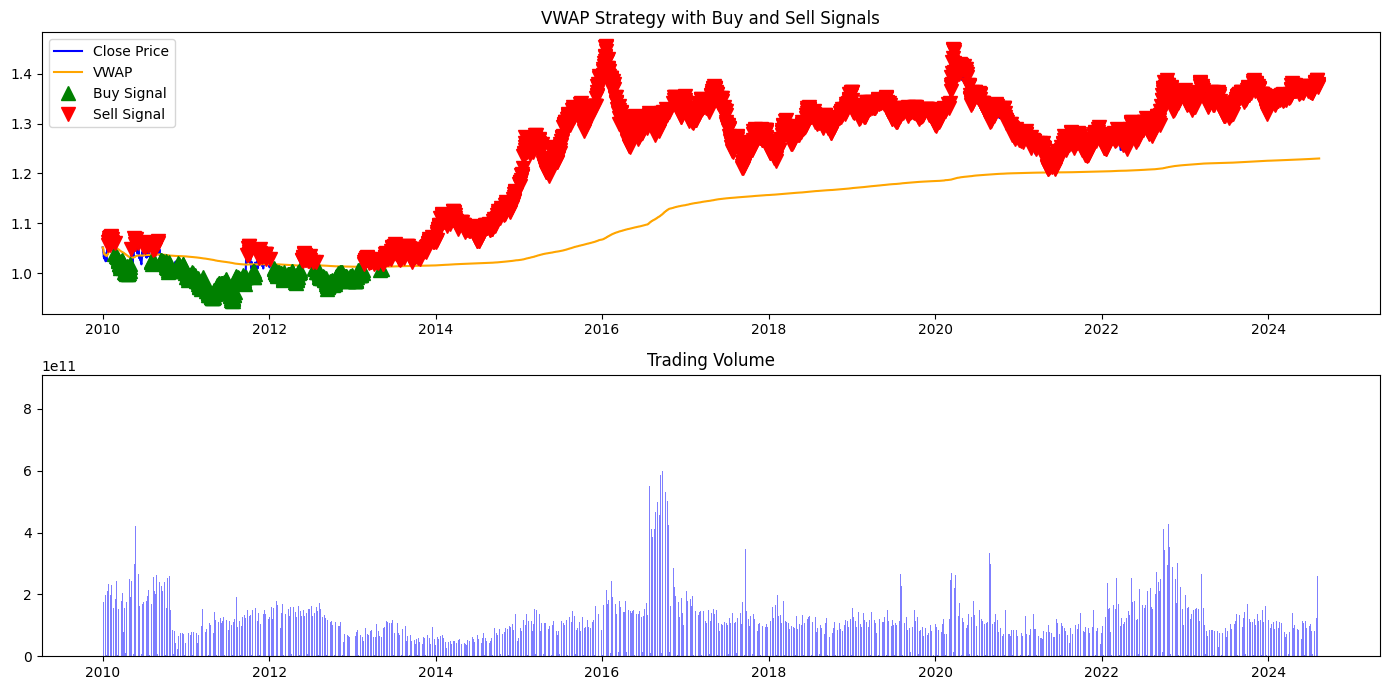

Total return: 11.95%


In [27]:
df=USDCAD.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=20).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=20).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

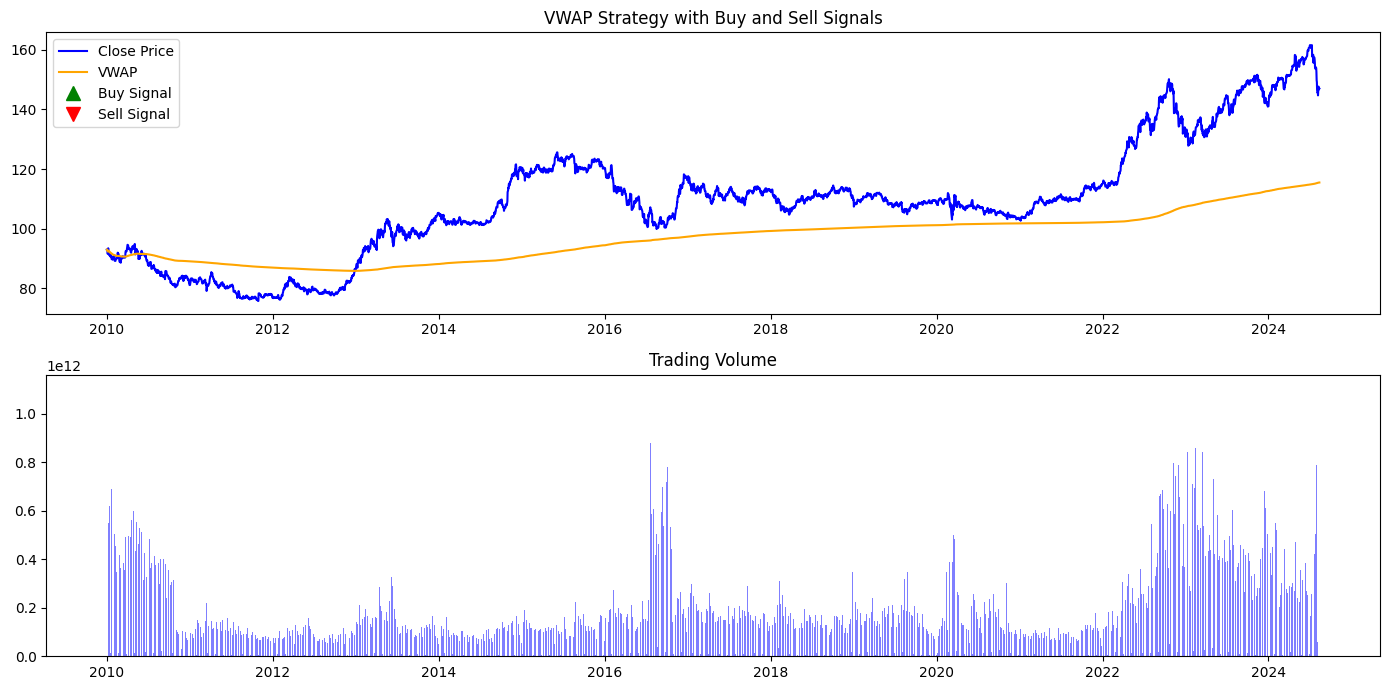

Total return: 0.00%


In [28]:
df=USDJPY.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=20).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=20).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

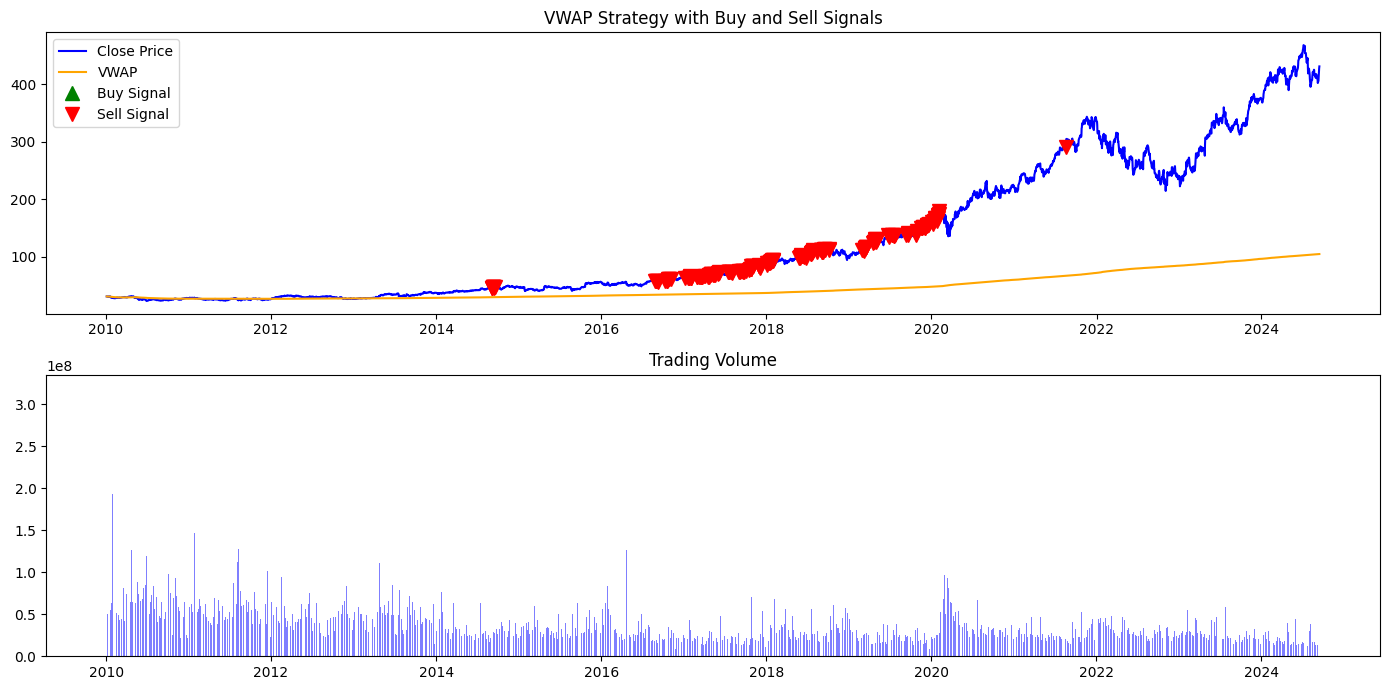

Total return: -42.40%


In [29]:
df=MSFT.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=20).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=20).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

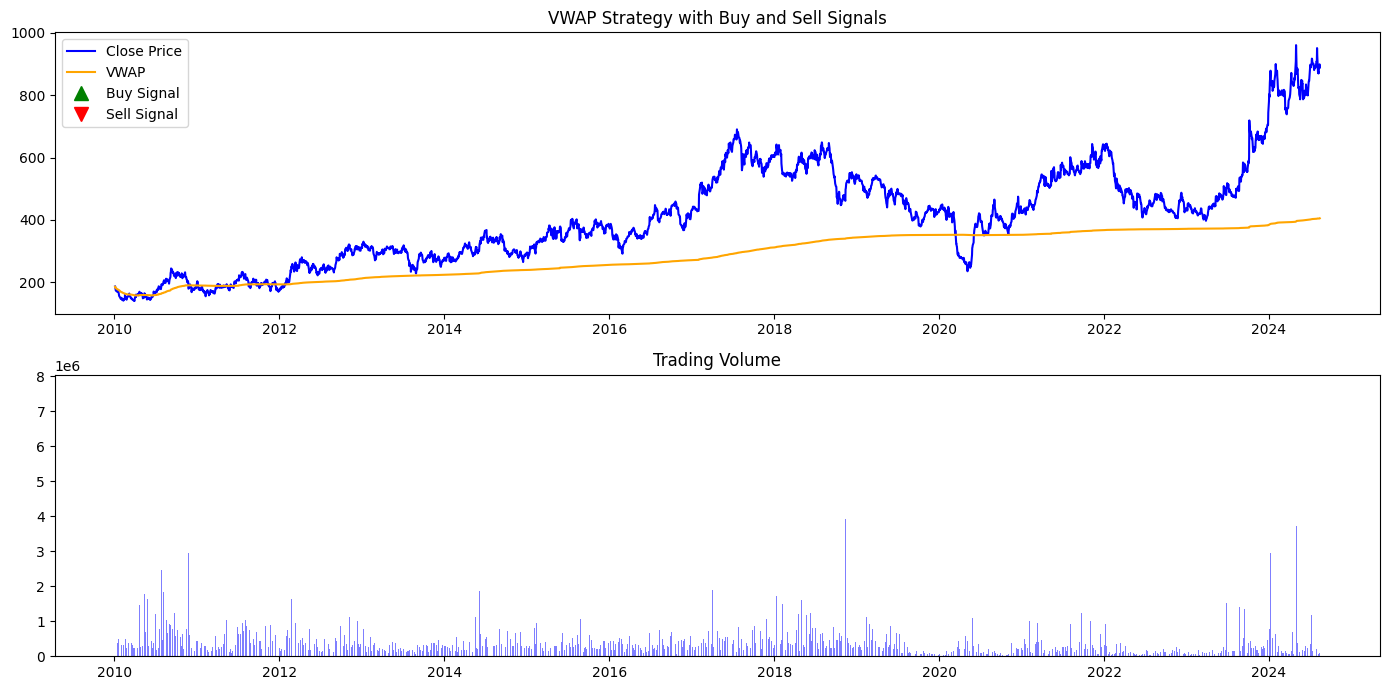

Total return: 0.00%


In [30]:
df=GODREJIND.copy()


def vwap(df, multiplier=1, atr_window=14):
    df.rename(columns={'close': 'Close'}, inplace=True)
    df.rename(columns={'high': 'High'}, inplace=True)
    df.rename(columns={'low': 'Low'}, inplace=True)
    df.rename(columns={'volume': 'Volume'}, inplace=True)
    high = df['High']
    low = df['Low']
    close = df['Close']
    volume = df['Volume']

    typical_price = (high + low + close) / 3
    vwap_values = (typical_price * volume).cumsum() / volume.cumsum()
    atr = (high - low).rolling(window=atr_window).mean()

    threshold = atr * multiplier

    buy_signal = (close < vwap_values * (1 - threshold)) & (volume > volume.rolling(window=20).mean())
    sell_signal = (close > vwap_values * (1 + threshold)) & (volume > volume.rolling(window=20).mean())

    df['VWAP'] = vwap_values
    df['Signal'] = 0
    df.loc[buy_signal, 'Signal'] = 1
    df.loc[sell_signal, 'Signal'] = -1
    df['Position'] = df['Signal'].shift()

    initial_capital = 10000
    risk_per_trade = 0.02
    df['Position Size'] = np.minimum(0.1 * initial_capital, risk_per_trade * initial_capital)


    return df


df = vwap(df)

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('VWAP Strategy with Buy and Sell Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='blue', alpha=0.5)
plt.title('Trading Volume')

plt.tight_layout()
plt.show()

df['Daily Return'] = df['Close'].pct_change() * df['Position'].shift()
cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

In [31]:
def portfolio_return(W,R):
  return W*R

weights={
    'GS': 0.0177,
    'META': 0.30387,
    'ETHUSDT': 0.0177,

    'EURUSD': 0.0531,
    'TCS': 0.0637,
    'NIFTY50': 0.0071,
    'NIFTYBANK': 0.0177,
    'RELIANCE': 0.0354,
    'TATAMOTORS': 0.0177,
    'AAPL': 0.0354,
    'AMZN': 0.0354,
    'AUDUSD': 0.0637,
    'BNBUSDT': 0.0177,
    'DOGEUSDT': 0.0093,
    'BTCUSDT': 0.0071,
    'SOLUSDT': 0.02705,
    'DOW': 0.0708,
    'GBPUSD': 0.0354,
    'USDCAD': 0.0354,
    'USDJPY': 0.0354,
    'MSFT':0.01658,
    'GODREJIND':0.0768

}
i=0
sums=0
for key,val in weights.items():

  res=portfolio_return(val,total[i])
  sums+=res
  i+=1
print(f"portfolio return:{sums}")

portfolio return:0.020742314982093717
